In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt



In [4]:
# Define the input shape of our images
input_shape = (224, 224, 3)

# Define the data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
        'C:/Users/kamya/OneDrive/Desktop/Mango_Classification/Dataset/Classification_dataset',
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical',
        subset='training')
val_generator = train_datagen.flow_from_directory(
        'C:/Users/kamya/OneDrive/Desktop/Mango_Classification/Dataset/Classification_dataset',
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical',
        subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'C:/Users/kamya/OneDrive/Desktop/Mango_Classification/Dataset/Classification_dataset',
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')


Found 1280 images belonging to 8 classes.
Found 320 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [5]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add our own classification layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 21,139,528
Trainable params: 6,424,840
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples//val_generator.batch_size)


C:\Users\kamya\AppData\Local\Temp\ipykernel_18856\1849866715.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
40/40 [==============================] - 251s 6s/step - loss: 2.3359 - accuracy: 0.3328 - val_loss: 1.3815 - val_accuracy: 0.5719
Epoch 2/10
40/40 [==============================] - 259s 6s/step - loss: 1.1748 - accuracy: 0.5695 - val_loss: 0.9767 - val_accuracy: 0.7437
Epoch 3/10
40/40 [==============================] - 255s 6s/step - loss: 0.8675 - accuracy: 0.6953 - val_loss: 0.8384 - val_accuracy: 0.7937
Epoch 4/10
40/40 [==============================] - 251s 6s/step - loss: 0.6937 - accuracy: 0.7500 - val_loss: 0.8087 - val_accuracy: 0.7594
Epoch 5/10
40/40 [==============================] - 255s 6s/step - loss: 0.6019 - accuracy: 0.7922 - val_loss: 0.7022 - val_accuracy: 0.8000
Epoch 6/10
40/40 [==============================] - 258s 6s/step - loss: 0.5345 - accuracy: 0.8117 - val_loss: 0.7087 - val_accuracy: 0.7906
Epoch 7/10
40/40 [==============================] - 262s 7s/step - loss: 0.5046 - accuracy: 0.8273 - val_loss: 0.5845 - val_accuracy: 0.8313
Epoch 8/10
40

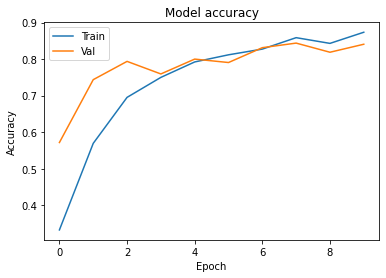

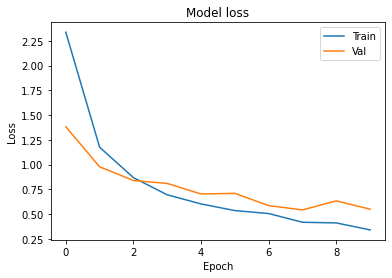

In [7]:
# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [8]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate_generator(val_generator, steps=val_generator.samples//val_generator.batch_size)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)




C:\Users\kamya\AppData\Local\Temp\ipykernel_18856\1352707615.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(val_generator, steps=val_generator.samples//val_generator.batch_size)


Validation loss: 0.5485803484916687
Validation accuracy: 0.840624988079071


In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=test_generator.samples//test_generator.batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


C:\Users\kamya\AppData\Local\Temp\ipykernel_18856\2997479615.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=test_generator.samples//test_generator.batch_size)


Test loss: 0.15923623740673065
Test accuracy: 0.9668750166893005


1/1 [==============================] - 1s 916ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted class: Fajri


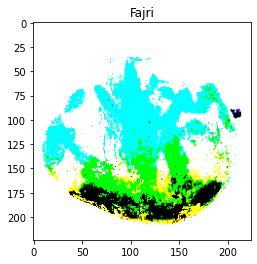

In [12]:

img_height, img_width = 224, 224
# Load and preprocess the test image
test_image = image.load_img('C:/Users/kamya/OneDrive/Desktop/Mango_Classification/Upload/IMG_20210702_074756.jpg', target_size=(img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Make predictions on the test image
predictions = model.predict(test_image)
predicted_class_index = np.argmax(predictions[0])
class_names = ['Anwar Ratool', 'Chaunsa(black)','Chaunsa(summer bahisht)', 'Chaunsa(white)', 'Dosehri', 'Fajri', 'Langra', 'Sindhri']
predicted_class_name = class_names[predicted_class_index]
print('Predicted class:', predicted_class_name)

# Display the image
plt.imshow(test_image[0])
plt.title(predicted_class_name)
plt.show()


1/1 [==============================] - 0s 138ms/step
Predicted class: Fajri


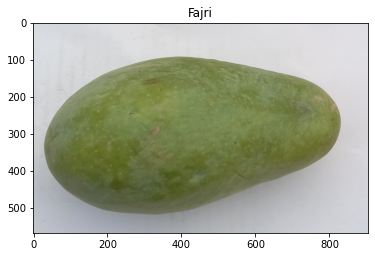

In [13]:


img_height, img_width = 224, 224

# Load and preprocess the test image
test_image = image.load_img('C:/Users/kamya/OneDrive/Desktop/Mango_Classification/Upload/IMG_20210702_182518.jpg', target_size=(img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Make predictions on the test image
predictions = model.predict(test_image)
predicted_class_index = np.argmax(predictions[0])
class_names = ['Anwar Ratool', 'Chaunsa(black)','Chaunsa(summer bahisht)', 'Chaunsa(white)', 'Dosehri', 'Fajri', 'Langra', 'Sindhri']
predicted_class_name = class_names[predicted_class_index]
print('Predicted class:', predicted_class_name)

# Display the test image
plt.imshow(image.load_img('C:/Users/kamya/OneDrive/Desktop/Mango_Classification/Upload/IMG_20210702_182518.jpg'))
plt.title(predicted_class_name)
plt.show()


In [14]:
# Save the final model
model.save('mango_classification_model.h5')

In [15]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('mango_classification_model.h5')